In [33]:
import pandas as pd
from pycaret.datasets import get_data
from pycaret.classification import *
import warnings
warnings.filterwarnings('ignore')

In [34]:
dataset = pd.read_csv('Back_Test_Result.csv')

In [35]:
dataset.head()

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P
0,Bullish,4,BUY,29,BUY,72,SELL
1,Bullish,29,BUY,68,BUY,51,BUY
2,Bullish,60,SELL,37,SELL,14,SELL
3,Bearish,9,BUY,64,SELL,94,BUY
4,Bullish,28,BUY,29,BUY,31,SELL


In [36]:
dataset['Current_Market'] = dataset['Current_Market'].replace(['Bullish','Bearish'],[1,0])
dataset['Rec1_P'] = dataset['Rec1_P'].replace(['BUY','SELL'],[1,0])
dataset['Rec2_P'] = dataset['Rec2_P'].replace(['BUY','SELL'],[1,0])
dataset['Rec3_P'] = dataset['Rec3_P'].replace(['BUY','SELL'],[1,0])

In [37]:
dataset.head()

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P
0,1,4,1,29,1,72,0
1,1,29,1,68,1,51,1
2,1,60,0,37,0,14,0
3,0,9,1,64,0,94,1
4,1,28,1,29,1,31,0


In [38]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (359, 7)
Unseen Data For Predictions: (19, 7)


In [39]:
exp_clf101 = setup(data = data, target = 'Current_Market', session_id=123, silent=True) 

,Description,Value
0,session_id,123
1,Target,Current_Market
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(359, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [40]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6017,0.6175,0.6637,0.6231,0.6356,0.1986,0.2030,0.0400
gbc,Gradient Boosting Classifier,0.5855,0.6744,0.6423,0.6072,0.6139,0.1677,0.1747,0.0110
ada,Ada Boost Classifier,0.5815,0.6116,0.6324,0.6119,0.6004,0.1557,0.1690,0.0130
et,Extra Trees Classifier,0.5740,0.6098,0.6429,0.6073,0.6090,0.1454,0.1532,0.0360
lightgbm,Light Gradient Boosting Machine,0.5695,0.6203,0.6423,0.5874,0.6021,0.1339,0.1464,0.0100
svm,SVM - Linear Kernel,0.5498,0.0000,0.8038,0.5021,0.6145,0.0707,0.0752,0.0050
knn,K Neighbors Classifier,0.5457,0.5755,0.5945,0.5807,0.5804,0.0839,0.0861,0.1330
nb,Naive Bayes,0.5415,0.5801,0.6258,0.5628,0.5857,0.0727,0.0716,0.1150
dt,Decision Tree Classifier,0.5342,0.5322,0.5962,0.5582,0.5716,0.0643,0.0682,0.1160
qda,Quadratic Discriminant Analysis,0.5338,0.5590,0.5808,0.5610,0.5642,0.0642,0.0669,0.0050


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [41]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5769,0.6250,0.5714,0.6154,0.5926,0.1538,0.1543
1,0.6000,0.5779,0.7143,0.6250,0.6667,0.1722,0.1746
2,0.5600,0.5844,0.4286,0.6667,0.5217,0.1486,0.1612
3,0.5600,0.6955,0.8462,0.5500,0.6667,0.0984,0.1201
4,0.5600,0.4936,0.6154,0.5714,0.5926,0.1158,0.1161
5,0.6000,0.6763,0.6923,0.6000,0.6429,0.1935,0.1961
6,0.7200,0.6859,0.7692,0.7143,0.7407,0.4373,0.4387
7,0.6400,0.6378,0.6154,0.6667,0.6400,0.2812,0.2821
8,0.5200,0.5353,0.6923,0.5294,0.6000,0.0260,0.0275
9,0.6800,0.6635,0.6923,0.6923,0.6923,0.3590,0.3590


In [42]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5769,0.6190,0.4286,0.6667,0.5217,0.1734,0.1871
1,0.5200,0.5000,0.7143,0.5556,0.6250,-0.0135,-0.0144
2,0.5600,0.5584,0.2857,0.8000,0.4211,0.1791,0.2417
3,0.6400,0.7564,0.7692,0.6250,0.6897,0.2718,0.2802
4,0.5200,0.5769,0.4615,0.5455,0.5000,0.0446,0.0452
5,0.6400,0.6410,0.6923,0.6429,0.6667,0.2765,0.2774
6,0.5200,0.6090,0.4615,0.5455,0.5000,0.0446,0.0452
7,0.6400,0.7179,0.8462,0.6111,0.7097,0.2671,0.2924
8,0.5200,0.5994,0.5385,0.5385,0.5385,0.0385,0.0385
9,0.7200,0.6795,0.6154,0.8000,0.6957,0.4444,0.4576


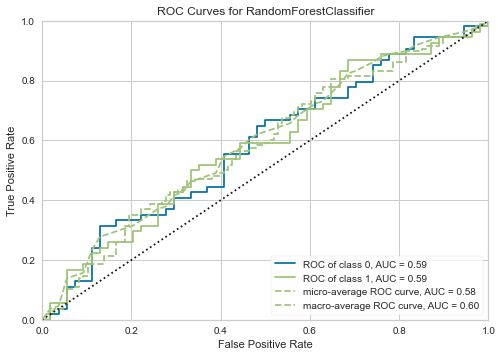

In [43]:
plot_model(tuned_rf, plot = 'auc')

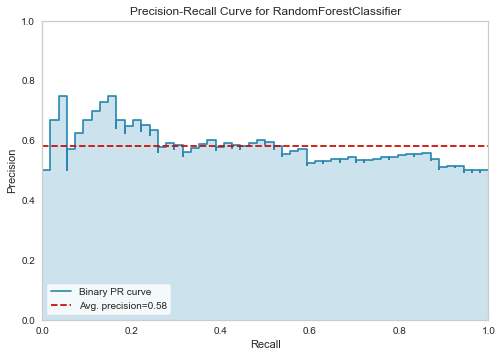

In [44]:
plot_model(tuned_rf, plot = 'pr')

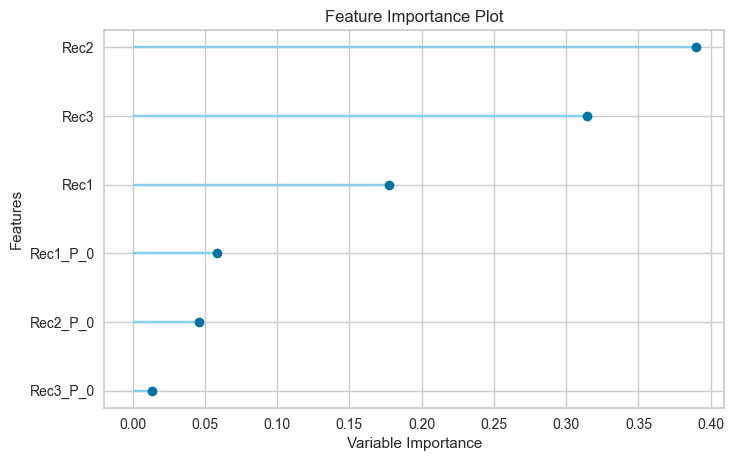

In [45]:
plot_model(tuned_rf, plot='feature')

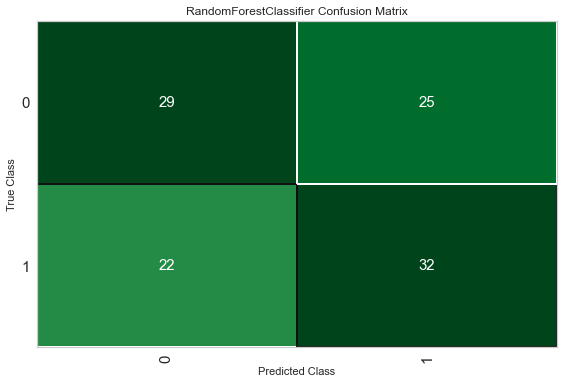

In [46]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [47]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5648,0.5861,0.5926,0.5614,0.5766,0.1296,0.1298


In [48]:
final_rf = finalize_model(tuned_rf)

In [49]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [50]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7500,0.8556,0.7778,0.7368,0.7568,0.5000,0.5008


In [51]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P,Label,Score
0,0,47,0,50,0,3,1,0,0.5420
1,0,44,0,26,1,11,0,0,0.6476
2,0,62,0,78,1,39,1,0,0.5544
3,1,75,0,42,1,41,0,1,0.5539
4,0,25,0,54,1,39,0,0,0.5284


In [52]:
save_model(final_rf,'Final RF Model 04Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Current_Market',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
              

In [56]:
saved_final_rf = load_model('Final RF Model 04Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [57]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [58]:
new_prediction.head()

,Current_Market,Rec1,Rec1_P,Rec2,Rec2_P,Rec3,Rec3_P,Label,Score
0,0,47,0,50,0,3,1,0,0.5420
1,0,44,0,26,1,11,0,0,0.6476
2,0,62,0,78,1,39,1,0,0.5544
3,1,75,0,42,1,41,0,1,0.5539
4,0,25,0,54,1,39,0,0,0.5284
